In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
# Load the IMDb reviews dataset
(train_data, test_data), info = tfds.load(
    name="imdb_reviews",
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.E7X93H_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.E7X93H_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.E7X93H_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


ValueError: too many values to unpack (expected 2)

In [ ]:


# Load the IMDb reviews dataset
datasets, info = tfds.load(
    name="imdb_reviews",
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True
)

# Access the train and test splits from the 'datasets' dictionary
train_data = datasets[tfds.Split.TRAIN]
test_data = datasets[tfds.Split.TEST]

TypeError: '_PrefetchDataset' object is not subscriptable

In [ ]:
# Load the IMDb reviews dataset

(train_data, test_data) = tfds.load(
    name="imdb_reviews",
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True
)

In [ ]:
# Show a couple of examples
print("First training example:")
for text, label in train_data.take(1):
    print(f"Review: {text.numpy().decode('utf-8')[:150]}...") # Decode byte string
    print(f"Label: {'Positive' if label.numpy() == 1 else 'Negative'}")

First training example:
Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be the...
Label: Negative


In [ ]:
# Define vocabulary size and sequence length
VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 256


In [ ]:
# Create a TextVectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
    standardize='lower_and_strip_punctuation'
)

In [ ]:
# Adapt the layer to the training text to build its vocabulary
train_text_ds = train_data.map(lambda text, label: text)
vectorize_layer.adapt(train_text_ds)

In [ ]:
# Function to apply vectorization to our datasets
def vectorize_text(text, label):
    text = vectorize_layer(text)
    return text, label

In [ ]:
# Apply vectorization and prepare datasets for training
BATCH_SIZE = 32
train_dataset = train_data.map(vectorize_text).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.map(vectorize_text).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
# Verify one batch
print("\nFirst vectorized batch shapes:")
for text_batch, label_batch in train_dataset.take(1):
    print(f"Text batch shape: {text_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")


First vectorized batch shapes:
Text batch shape: (32, 256)
Label batch shape: (32,)


In [ ]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Define the model architecture
model = models.Sequential([

    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=16),

    layers.GlobalAveragePooling1D(),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Display model summary (now with correct shapes and parameters)
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("\nTraining the model...")
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)


Training the model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6045 - loss: 0.6712 - val_accuracy: 0.7426 - val_loss: 0.5577
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7965 - loss: 0.5059 - val_accuracy: 0.8156 - val_loss: 0.4366
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8495 - loss: 0.3934 - val_accuracy: 0.8409 - val_loss: 0.3810
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8723 - loss: 0.3344 - val_accuracy: 0.8546 - val_loss: 0.3504
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8856 - loss: 0.2970 - val_accuracy: 0.8629 - val_loss: 0.3320
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8955 - loss: 0.2701 - val_accuracy: 0.8673 - val_loss: 0.3207
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9048 - loss: 0.2492 - val_accuracy: 0.8707 - val_loss: 0.3141
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9110 - loss: 

In [ ]:
# Plot training history
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


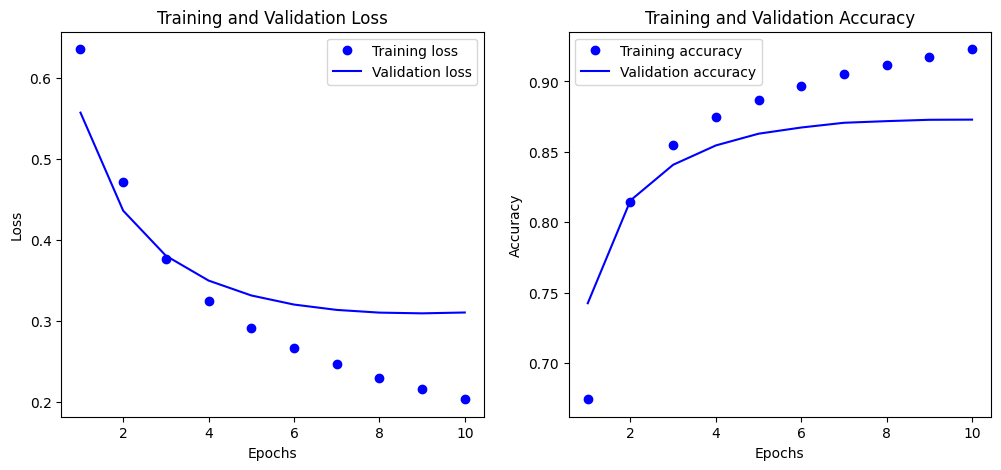

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np

In [ ]:
# Define a list of example sentences to predict
example_sentences = [
    "This movie was fantastic! I absolutely loved it.",
    "It was okay, nothing special, just average.",
    "Worst movie I've ever seen. A complete waste of time and money.",
    "The plot was confusing and the acting was terrible.",
    "A heartwarming story with superb performances."
]

In [ ]:
raw_predict_data = tf.data.Dataset.from_tensor_slices(example_sentences)
vectorized_predict_data = raw_predict_data.map(vectorize_layer).batch(1)

In [ ]:
# Make predictions
print("Making predictions on example sentences...")
predictions = model.predict(vectorized_predict_data)

Making predictions on example sentences...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
# Interpret the predictions
print("\n--- Predictions ---")
for i, sentence in enumerate(example_sentences):

    sentiment_score = predictions[i][0]
    predicted_sentiment = "Positive" if sentiment_score >= 0.5 else "Negative"

    print(f"Review: \"{sentence}\"")
    print(f"Predicted Sentiment: {predicted_sentiment} (Score: {sentiment_score:.4f})\n")


--- Predictions ---
Review: "This movie was fantastic! I absolutely loved it."
Predicted Sentiment: Positive (Score: 0.8193)

Review: "It was okay, nothing special, just average."
Predicted Sentiment: Negative (Score: 0.4010)

Review: "Worst movie I've ever seen. A complete waste of time and money."
Predicted Sentiment: Negative (Score: 0.0750)

Review: "The plot was confusing and the acting was terrible."
Predicted Sentiment: Negative (Score: 0.2486)

Review: "A heartwarming story with superb performances."
Predicted Sentiment: Positive (Score: 0.8051)

